In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
import plotly
plotly.tools.set_credentials_file(username='GravityFalls', api_key='ApuSic9mNScdBP9oWpnw')

In [27]:
dataset = pickle.load(open('Datasets/data.p', 'rb'))
dataset.columns, dataset.shape

(Index(['district', 'state', 'year', 'party', 'candidatevotes', 'totalvotes',
        'candidate', 'national_poll', 'national_poll_prev',
        'national_poll_delta_subtract', 'national_poll_delta_divide',
        'previous_party', 'dem_win_margin_prev', 'rep_win_margin_prev',
        'margin_signed_minus_prev', 'margin_signed_divide_prev',
        'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev',
        'dem_win_prev', 'rep_win_prev', 'dem_win', 'rep_win'],
       dtype='object'), (1269, 22))

# Flip Margins

### Fraction of districts in states flipping (for only rep or dem)

In [24]:
#flip only rep, flip only dem (in tm2)
dem_only = False

year_interest = 2016

subset = dataset[dataset['year'] == year_interest]
subset = subset[subset['dem_win_prev'] == dem_only]
print(subset.shape)
print(any(pd.isnull(subset)))

changeStates = subset.loc[(subset['dem_win'] != subset['dem_win_prev']), 'state'].to_frame()
noChangeStates = subset.loc[(subset['dem_win'] == subset['dem_win_prev']), 'state'].to_frame()
totalStates = subset['state'].to_frame()

print(changeStates.shape)
print(noChangeStates.shape)
    
changeStatesPlot = {}
noChangeStatesPlot = {}
totalStatesPlot = {}
for state, shard in changeStates.groupby('state'):
    changeStatesPlot[state] = shard.shape[0]
for state, shard in noChangeStates.groupby('state'):
    noChangeStatesPlot[state] = shard.shape[0]
for state, shard in totalStates.groupby('state'):
    totalStatesPlot[state] = shard.shape[0]
    
# #normalize
# for key, value in changeStatesPlot.items():
#     changeStatesPlot[key] = value/totalStatesPlot[key]
# for key, value in noChangeStatesPlot.items():
#     noChangeStatesPlot[key] = value/totalStatesPlot[key]

# 1hot
for key, value in changeStatesPlot.items():
    changeStatesPlot[key] = 1
for key, value in noChangeStatesPlot.items():
    noChangeStatesPlot[key] = 1

plot_locs = []
plot_vals = []
for key, value in changeStatesPlot.items():
#for key, value in noChangeStatesPlot.items():
    plot_locs.append(key)
    plot_vals.append(float(value))

if not dem_only:
    cscalee = 'Blues'
else:
    cscalee = 'Reds'
    
data = [ dict(
        type='choropleth',
        colorscale = cscalee,
        reversescale=False,
        #autocolorscale = True,
        locations = plot_locs,
        z = plot_vals,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Number of Districts with Flips"
        )
    ) ]

if dem_only:
    t_title = '{} Presence of Districts Flipping From Democrat to Republican by State'.format(year_interest)
else:
    t_title = '{} Presence of Districts Flipping From Republican to Democrat by State'.format(year_interest)

layout = dict(
        title = t_title,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

(241, 22)
True
(9, 1)
(232, 1)


In [28]:
margin_winner_cols = ['margin_signed_minus_prev', 'margin_signed_divide_prev', 'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev', 'dem_win_prev']
margin_cols = ['margin_signed_minus_prev', 'margin_signed_divide_prev', 'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev']
changeMargins = dataset.loc[dataset['dem_win'] != dataset['dem_win_prev'], margin_winner_cols]
noChangeMargins = dataset.loc[dataset['dem_win'] == dataset['dem_win_prev'], margin_winner_cols]
noChangeMargins.shape, changeMargins.shape

((1174, 5), (95, 5))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



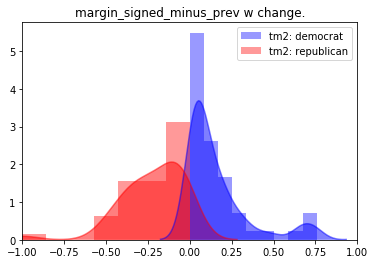

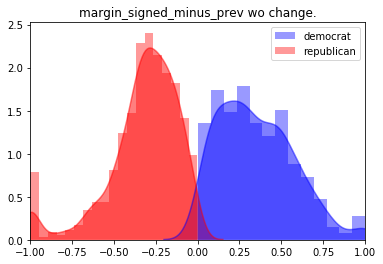

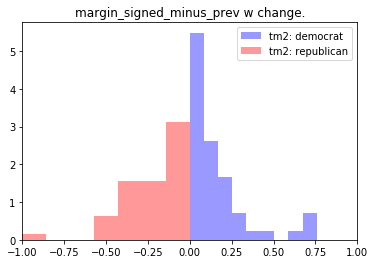

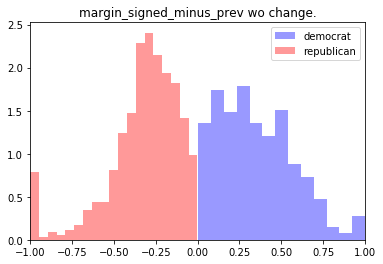

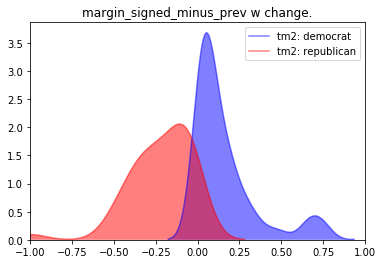

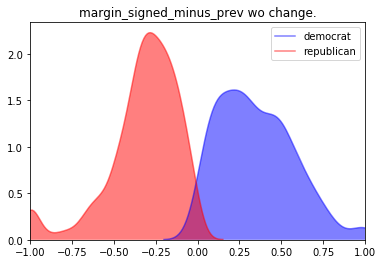

In [29]:
kde_alpha = 0.5
hist_alpha = 0.4
hist_density = True

dem_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 1, 'margin_signed_minus_prev'].values
rep_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 0, 'margin_signed_minus_prev'].values

dem_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 1, 'margin_signed_minus_prev'].values
rep_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 0, 'margin_signed_minus_prev'].values


dem_data_change = dem_data_change[~np.isnan(dem_data_change)]
rep_data_change = rep_data_change[~np.isnan(rep_data_change)]

dem_data_no_change = dem_data_no_change[~np.isnan(dem_data_no_change)]
rep_data_no_change = rep_data_no_change[~np.isnan(rep_data_no_change)]

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat')
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican')
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat')
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican')
plt.xlim(-1,1)
plt.legend()
plt.show()  

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat', kde=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican', kde=False)
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat', kde=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican', kde=False)
plt.xlim(-1,1)
plt.legend()
plt.show() 

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat', hist=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican', hist=False)
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat', hist=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican', hist=False)
plt.xlim(-1,1)
plt.legend()
plt.show() 

In [41]:
plt.rcParams['figure.figsize'] = 12, 8

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



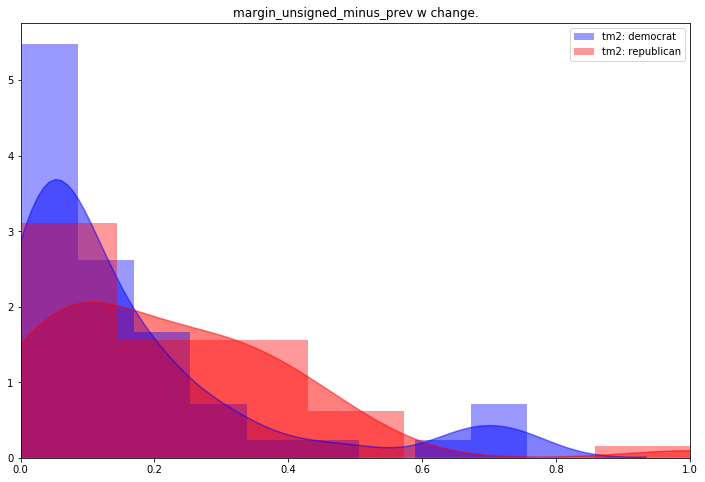

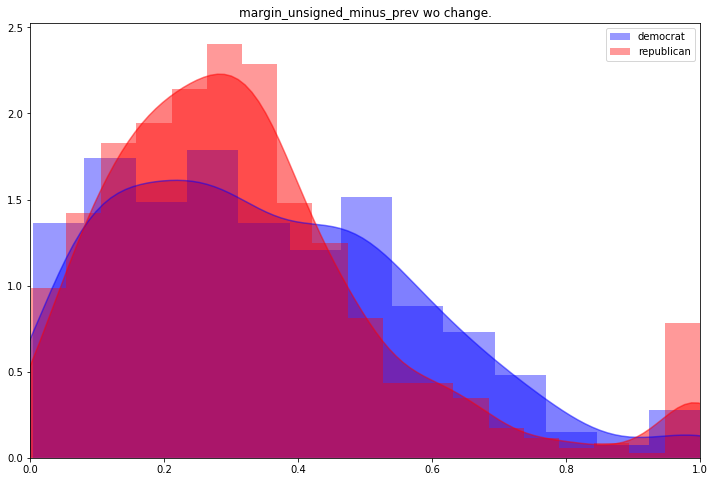

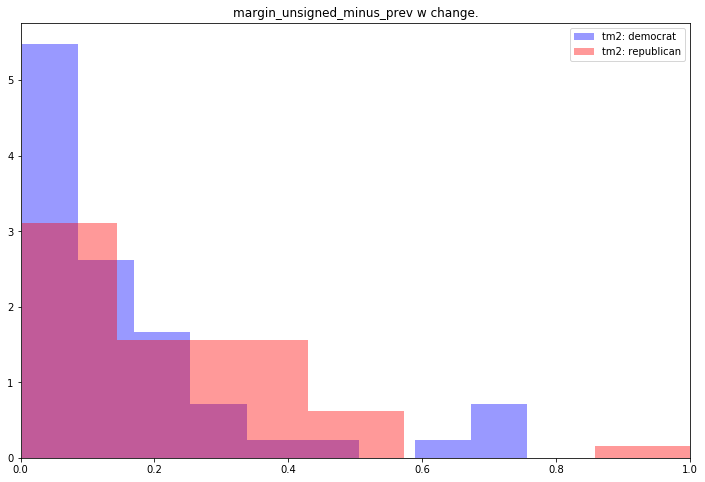

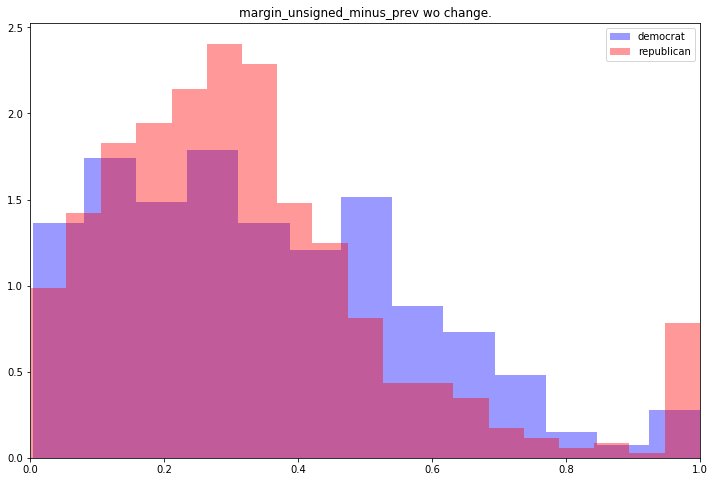

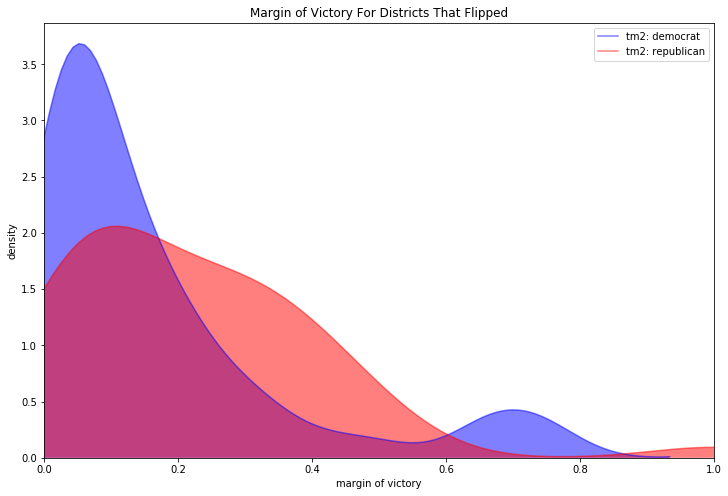

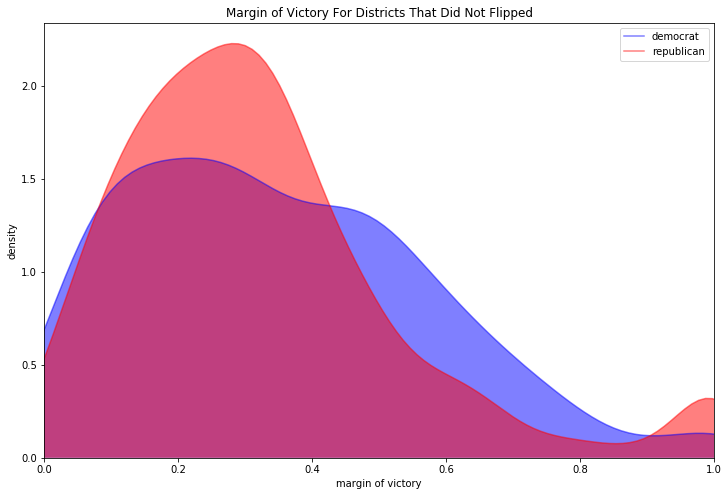

In [42]:
kde_alpha = 0.5
hist_alpha = 0.4
hist_density = True

dem_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 1, 'margin_unsigned_minus_prev'].values
rep_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 0, 'margin_unsigned_minus_prev'].values

dem_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 1, 'margin_unsigned_minus_prev'].values
rep_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 0, 'margin_unsigned_minus_prev'].values


dem_data_change = dem_data_change[~np.isnan(dem_data_change)]
rep_data_change = rep_data_change[~np.isnan(rep_data_change)]

dem_data_no_change = dem_data_no_change[~np.isnan(dem_data_no_change)]
rep_data_no_change = rep_data_no_change[~np.isnan(rep_data_no_change)]

plt.title('margin_unsigned_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat')
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican')
plt.xlim(0,1)
plt.legend()
plt.show()    

plt.title('margin_unsigned_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat')
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican')
plt.xlim(0,1)
plt.legend()
plt.show()    

plt.title('margin_unsigned_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat', kde=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican', kde=False)
plt.xlim(0,1)
plt.legend()
plt.show()    

plt.title('margin_unsigned_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat', kde=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican', kde=False)
plt.xlim(0,1)
plt.legend()
plt.show()    

plt.title('Margin of Victory For Districts That Flipped')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: democrat', hist=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='tm2: republican', hist=False)
plt.xlim(0,1)
plt.legend()
plt.ylabel('density')
plt.xlabel('margin of victory')
plt.show()    

plt.title('Margin of Victory For Districts With Did Not Flipped')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='democrat', hist=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha, 'density': hist_density}, label='republican', hist=False)
plt.xlim(0,1)
plt.legend()
plt.ylabel('density')
plt.xlabel('margin of victory')
plt.show()    

# Flip Locations

In [ ]:
dataset_nodrop = pickle.load(open('Datasets/data_nodrop.p', 'rb'))

In [ ]:
dataset_nodrop.columns, dataset_nodrop.shape

In [ ]:
dataset.columns, dataset.shape

### Fraction Districts Won by Democrats

In [ ]:
year_interest = 2016

subset = dataset_nodrop[dataset_nodrop['year'] == year_interest]
print(subset.shape)
interest = subset.groupby(['state'])['dem_win'].mean().to_frame().reset_index()
print(interest.shape)

data = [ dict(
        type='choropleth',
        colorscale = 'Blues',
        reversescale=True,
        autocolorscale = False,
        locations = interest['state'],
        z = interest['dem_win'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Fraction Won"
        )
    ) ]

layout = dict(
        title = '{} Fraction Districts Won by Democrats by State'.format(year_interest),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

In [ ]:
dataset.columns

In [ ]:
dataset[dataset.index.str.contains('AR')].index

### Fraction of districts in states flipping

In [ ]:
year_interest = 2012

subset = dataset[dataset['year'] == year_interest]
print(subset.shape)

changeStates = subset.loc[subset['dem_win'] != subset['dem_win_prev'], 'state'].to_frame()
noChangeStates = subset.loc[subset['dem_win'] == subset['dem_win_prev'], 'state'].to_frame()
totalStates = subset['state'].to_frame()

changeStatesPlot = {}
noChangeStatesPlot = {}
totalStatesPlot = {}
for state, shard in changeStates.groupby('state'):
    changeStatesPlot[state] = shard.shape[0]
for state, shard in noChangeStates.groupby('state'):
    noChangeStatesPlot[state] = shard.shape[0]
for state, shard in totalStates.groupby('state'):
    totalStatesPlot[state] = shard.shape[0]
    
#normalize
for key, value in changeStatesPlot.items():
    changeStatesPlot[key] = value/totalStatesPlot[key]
for key, value in noChangeStatesPlot.items():
    noChangeStatesPlot[key] = value/totalStatesPlot[key]
    
plot_locs = []
plot_vals = []
for key, value in changeStatesPlot.items():
#for key, value in noChangeStatesPlot.items():
    plot_locs.append(key)
    plot_vals.append(float(value))

data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        #colorscale = 'Blackbody',
        #reversescale=True,
        autocolorscale = False,
        locations = plot_locs,
        z = plot_vals,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Fraction Flips"
        )
    ) ]

layout = dict(
        title = '{} Fraction Flips by State'.format(year_interest),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

### Fraction of districts in states NOT flipping (for only rep or dem)

In [ ]:
#flip only rep, flip only dem (in tm2)
dem_only = False

year_interest = 2014

subset = dataset[dataset['year'] == year_interest]
print(subset.shape)



if dem_only:
    changeStates = subset.loc[(subset['dem_win'] != subset['dem_win_prev']) & (subset['dem_win_prev'] == dem_only), 'state'].to_frame()
    noChangeStates = subset.loc[(subset['dem_win'] == subset['dem_win_prev']) & (subset['dem_win_prev'] == dem_only), 'state'].to_frame()
    totalStates = subset.loc[subset['dem_win_prev'] == dem_only, 'state'].to_frame()
    
changeStatesPlot = {}
noChangeStatesPlot = {}
totalStatesPlot = {}
for state, shard in changeStates.groupby('state'):
    changeStatesPlot[state] = shard.shape[0]
for state, shard in noChangeStates.groupby('state'):
    noChangeStatesPlot[state] = shard.shape[0]
for state, shard in totalStates.groupby('state'):
    totalStatesPlot[state] = shard.shape[0]
    
#normalize
for key, value in changeStatesPlot.items():
    changeStatesPlot[key] = value/totalStatesPlot[key]
for key, value in noChangeStatesPlot.items():
    noChangeStatesPlot[key] = value/totalStatesPlot[key]
    
plot_locs = []
plot_vals = []
#for key, value in changeStatesPlot.items():
for key, value in noChangeStatesPlot.items():
    plot_locs.append(key)
    plot_vals.append(float(value))

data = [ dict(
        type='choropleth',
        #colorscale = 'Green',
        #reversescale=True,
        autocolorscale = True,
        locations = plot_locs,
        z = plot_vals,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Fraction Flips"
        )
    ) ]

if dem_only:
    t_title = '{} Fraction No Flips From Democrat by State'.format(year_interest)
else:
    t_title = '{} Fraction No Flips From Republican by State'.format(year_interest)

layout = dict(
        title = t_title,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

### Signed Margins Per State

In [ ]:
#margins (signed)
year_interest = 2012

subset = dataset[dataset['year'] == year_interest]
print(subset['year'].values[0])
print(subset.shape)
interest = subset.groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()
print(interest.shape)

data = [ dict(
        type='choropleth',
        colorscale = 'RdBu',
        reversescale=True,
        autocolorscale = False,
        locations = interest['state'],
        z = interest['margin_signed_minus_prev'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Margin Delta"
        )
    ) ]

layout = dict(
        title = '{} Signed Margin Delta by State'.format(year_interest),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

### Signed Margins In States w. Flipping

In [ ]:
#margins (signed)
year_interest = 2012

subset = dataset[dataset['year'] == year_interest]
print(subset['year'].values[0])
print(subset.shape)

interestChange = subset.loc[subset['dem_win'] != subset['dem_win_prev']].groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()
interestNoChange = subset.loc[subset['dem_win'] == subset['dem_win_prev']].groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()

#interest = subset.groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()
print(interest.shape)
print(interestChange.shape)
print(interestNoChange.shape)

data = [ dict(
        type='choropleth',
        colorscale = 'RdBu',
        reversescale=True,
        autocolorscale = False,
        locations = interestChange['state'],
        z = interestChange['margin_signed_minus_prev'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Margin Delta"
        )
    ) ]

layout = dict(
        title = '{} Signed Margin Delta for States with District Flips'.format(year_interest),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

### Signed Margins In States wo. Flipping

In [ ]:
#margins (signed)
year_interest = 2012

subset = dataset[dataset['year'] == year_interest]
print(subset['year'].values[0])
print(subset.shape)

interestChange = subset.loc[subset['dem_win'] != subset['dem_win_prev']].groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()
interestNoChange = subset.loc[subset['dem_win'] == subset['dem_win_prev']].groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()

#interest = subset.groupby(['state'])['margin_signed_minus_prev'].mean().to_frame().reset_index()
print(interest.shape)
print(interestChange.shape)
print(interestNoChange.shape)

data = [ dict(
        type='choropleth',
        colorscale = 'Bluered',
        reversescale=True,
        autocolorscale = False,
        locations = interestNoChange['state'],
        z = interestNoChange['margin_signed_minus_prev'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Margin Delta"
        )
    ) ]

layout = dict(
        title = '{} Signed Margin Delta for States without District Flips'.format(year_interest),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = plotly.plotly.plot( fig, filename='d3-cloropleth-map' )

### Signed Margins In states flipping (for only rep or dem)

In [ ]:
#margins (signed)


### Signed Margins In states NOT flipping (for only rep or dem)

In [ ]:
#margins (signed)


# TRY PLOTTING THE RAW MARGINS

In [ ]:
reset